In [1]:
pip install squarify


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from sklearn.utils import resample 
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_curve,
    auc 
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_formart = 'svg'
sns.set(style='whitegrid')


### Loading data

In [3]:
DATAPATH = "Insurance claims data.csv"

df = pd.read_csv(DATAPATH)

df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [4]:
column_names = df.columns

print (column_names)

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')


In [5]:
shape = df.shape
print(shape)

(58592, 41)


### Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [7]:
df.dtypes

policy_id                            object
subscription_length                 float64
vehicle_age                         float64
customer_age                          int64
region_code                          object
region_density                        int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
steering_type                   

In [8]:
df.isna().sum().value_counts()

0    41
Name: count, dtype: int64

In [9]:
# Dropping the "Policy_id" columns from the dataframe along the column axis
df.drop(columns='policy_id', axis=1, inplace=True)

### Exploratory Data Analysis

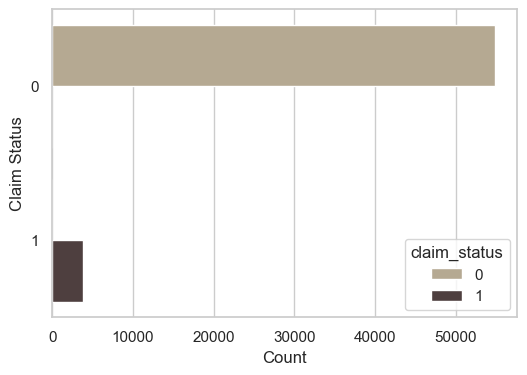

In [10]:
# Creating a count plot for the visualizing the distribution of the claim status.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='claim_status', hue='claim_status', palette=['#BBAB8C', '#503C3C'])
plt.xlabel('Count')
plt.ylabel('Claim Status')
plt.show()

In [11]:
# Selecting the numerical column from the dataframe and storing their columns names in a variable
numerical_columns = df[['subscription_length', 'vehicle_age', 'customer_age']].columns

# Displaing the column names of the selected column_names
numerical_columns

Index(['subscription_length', 'vehicle_age', 'customer_age'], dtype='object')

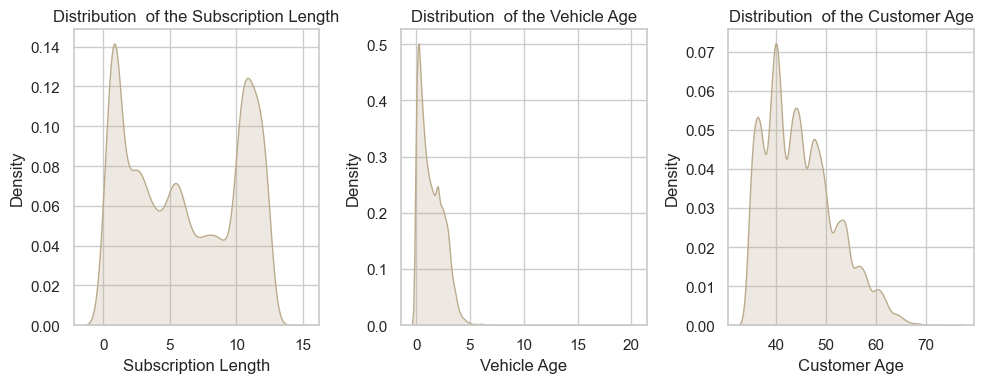

In [12]:
# Plotting distributions of numericals features
plt.figure(figsize=(10,4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3, 3, i)
    sns.kdeplot(df[col], fill = True, color='#BBAB8C')
    plt.title(f'Distribution  of the {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')

plt.tight_layout()
plt.show()

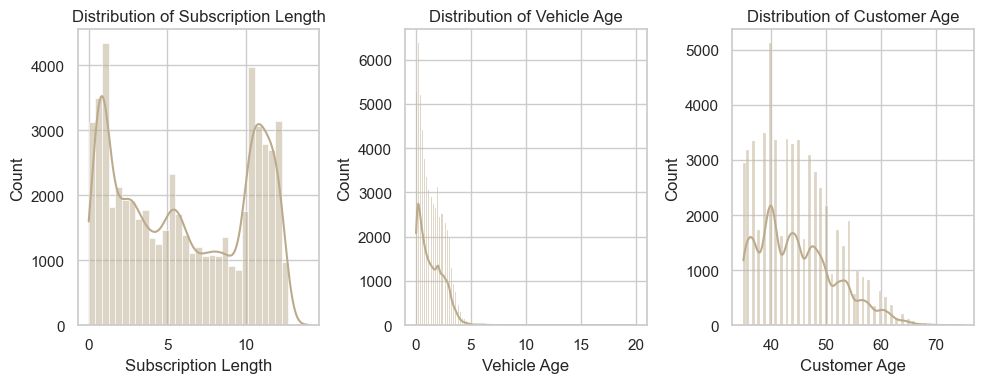

In [13]:
# Creating the subplots to visualize the distribution of numerical columns
plt.figure(figsize=(10,4))
for i, col in enumerate (numerical_columns, 1):
    plt.subplot(1,3,i)
    sns.histplot(data=df, x=col, color='#BBAB8C', kde=True)
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()

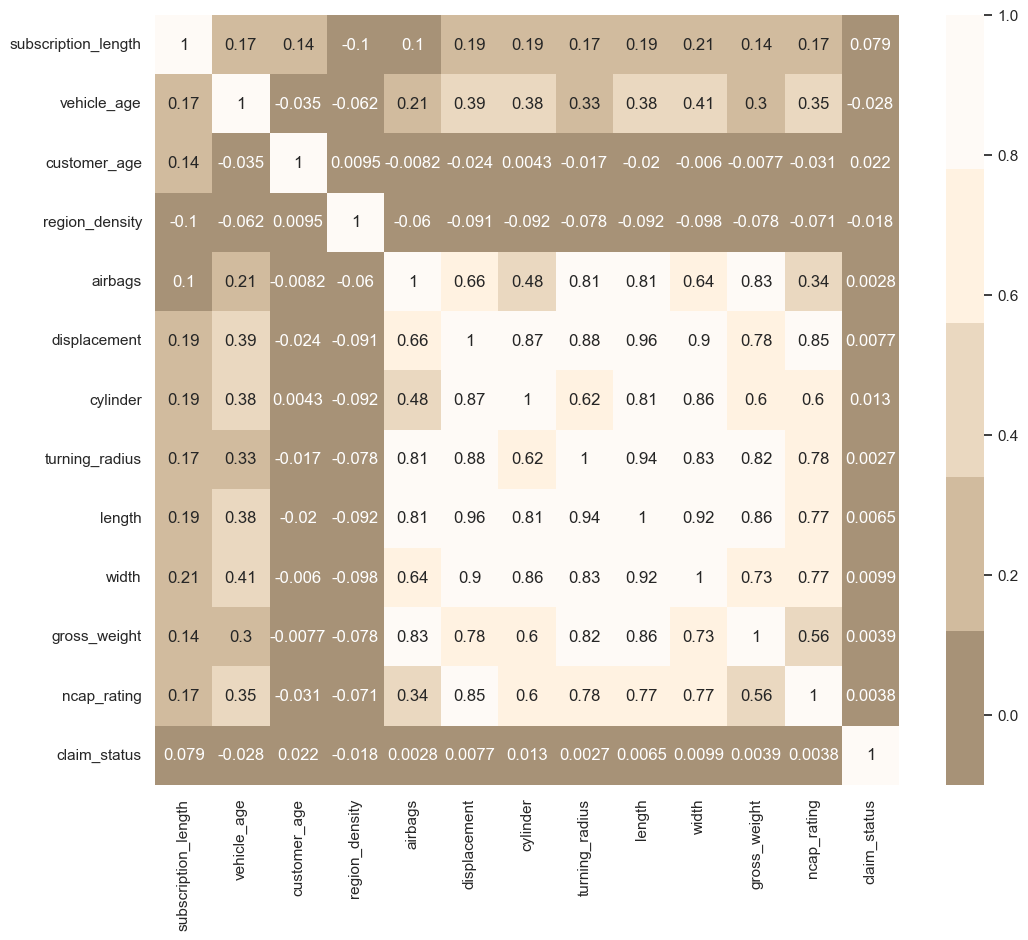

In [14]:
# Creating a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap=['#A79277', '#D1BB9E','#EAD8C0', '#FFF2E1', '#FEFAF6'])
plt.show()

In [15]:
# Specifing a list of the catagorical columns

categorical_columns = ['region_code', 'segment', 'fuel_type']


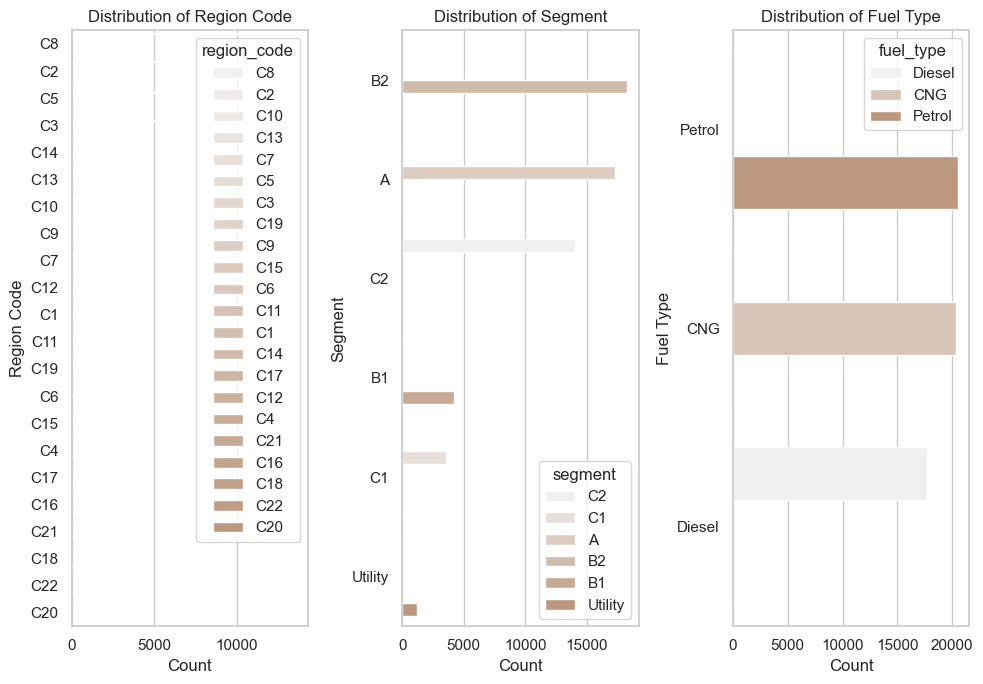

In [16]:
# Creating the subplots to visualizing the distribution of the categorical columns

plt.figure(figsize=(10, 7))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1,3,i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, hue=col, color='#C69774')
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel('Count')
    plt.ylabel(f'{" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()

### Oversampling the minority classes

In [17]:
# Creating subsets of the dataframe based on the claim_status column:
# - 'minority' contains rows where 'claim_status' is equal to 1
# - 'majority' contaions rows where "claim_status" is equal to 0

minority = df[df['claim_status'] == 1]
majority = df[df['claim_status'] == 0]

In [18]:
majority.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [19]:
minority.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
12,10.2,1.6,41,C2,27003,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
29,10.9,2.0,41,C10,73430,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
76,12.2,0.4,41,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,1
81,11.1,1.0,57,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
84,1.1,0.0,53,C3,4076,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,1


In [20]:
# Oversampling the minority class to balance the dataset
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

In [21]:
# Concatenate the majority class with the oversampled minority class to create teh balance dataset
oversampled_data = pd.concat([majority, minority_oversampled])
oversampled_data.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [22]:
# Counting the no of occurrences of each class in the 'claim_status' column
oversampled_data['claim_status'].value_counts()

claim_status
0    54844
1    54844
Name: count, dtype: int64

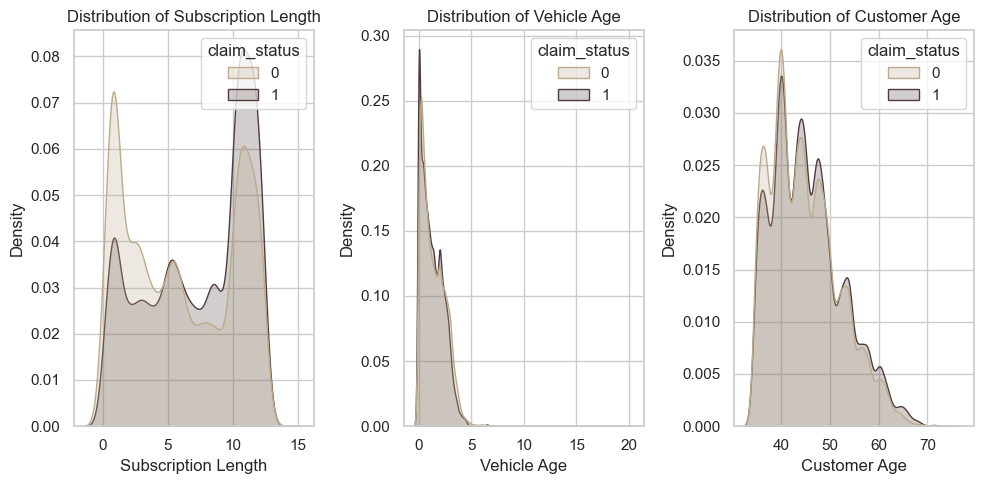

In [23]:
# Creating subplots to visualize the distribution of numerical columns with KDE plots
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=oversampled_data, x=col, hue='claim_status', fill=True, palette=['#BBAB8C', '#503C3C'])
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()

### Feature Engineering

In [25]:
# Intialize a label encoder
labenc = LabelEncoder()
encoded_data = df.apply(lambda col : labenc.fit_transform(col) if col.dtype == 'object' else col)


In [26]:
encoded_data.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
1,8.2,1.8,35,11,27003,3,10,1,2,8,...,0,1,1,1,1,1,1,1,4,0
2,9.5,0.2,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
3,5.2,0.4,44,1,73430,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
4,10.1,1.0,56,4,5410,2,6,1,3,7,...,0,1,1,1,0,0,1,1,5,0


In [27]:
# separating the feature (x) and the target variable (y)

X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

In [28]:
# Instantiate the random Forest classifier with the random state of the 42

rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the trainning data
rf_model.fit(X,y)


RandomForestClassifier(random_state=42)

In [29]:
# Get the feature importances from the trained Random Forest model

feature_importance = rf_model.feature_importances_


In [33]:
# create a dataframe to store the feature names and their corresponding importances
features_df = pd.DataFrame({'Feature' : X.columns, 'Importances': feature_importance})

# Sort the dataframe by feature importance in decending order
features_df = features_df.sort_values(by="Importances", ascending = False)
features_df.head(10)

,Feature,Importances
0,subscription_length,0.417150
2,customer_age,0.263397
1,vehicle_age,0.193724
4,region_density,0.059310
3,region_code,0.058201
6,model,0.000672
23,length,0.000639
24,width,0.000591
22,turning_radius,0.000504
25,gross_weight,0.000491


In [34]:
# Separating features (X) and target variable (y) from the oversampled dataset
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

In [36]:
# Apply LabelEncoder to each column if the column dtypes is 'object' , else keep the column as is
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

### Data Splitting

In [37]:
# Splitting the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_encoded, y_oversampled, test_size=0.4, random_state=42)

### Model Training

In [38]:
# Instantiate the Random Classifier with a random state of 42
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# predecting the traget variable for the test set using the trained model
y_pred = rf_model_oversampled.predict(X_test)

In [40]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     21994
           1       0.95      1.00      0.97     21882

    accuracy                           0.97     43876
   macro avg       0.97      0.97      0.97     43876
weighted avg       0.97      0.97      0.97     43876



### Model Evalution

In [41]:
# Create a dataframe to store the top 5 most important features and their importances
importance_df = pd.DataFrame({'Column': list(map(lambda col: ' '.join(map(str.title, col.split('_'))), X_oversampled_encoded.columns)), "Importance": rf_model_oversampled.feature_importances_}).sort_values(by='Importance', ascending=False).head(5)

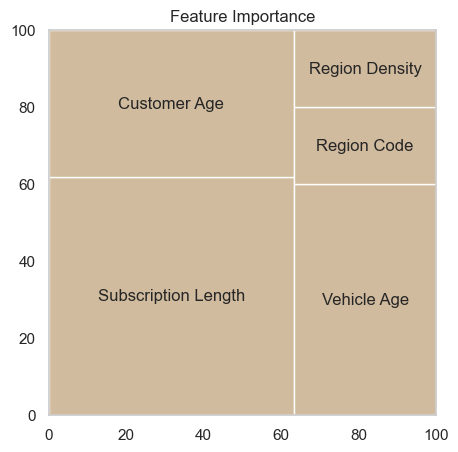

In [42]:
# Set up figure and plot the treemap
plt.figure(figsize=(5, 5))
squarify.plot(sizes=importance_df['Importance'], label=importance_df['Column'], color='#D1BB9E', edgecolor='white')
plt.title('Feature Importance')
plt.show()

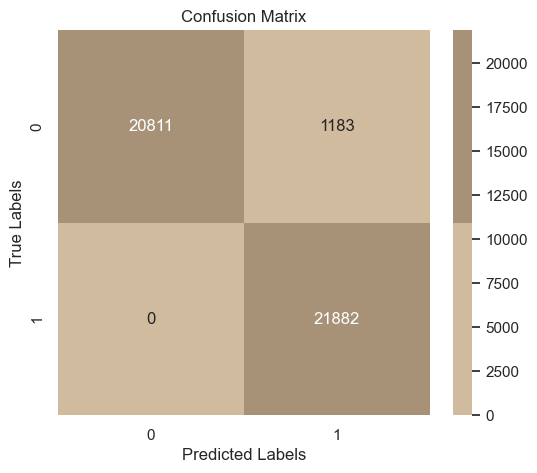

In [43]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=['#D1BB9E', '#A79277'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9730376515634971


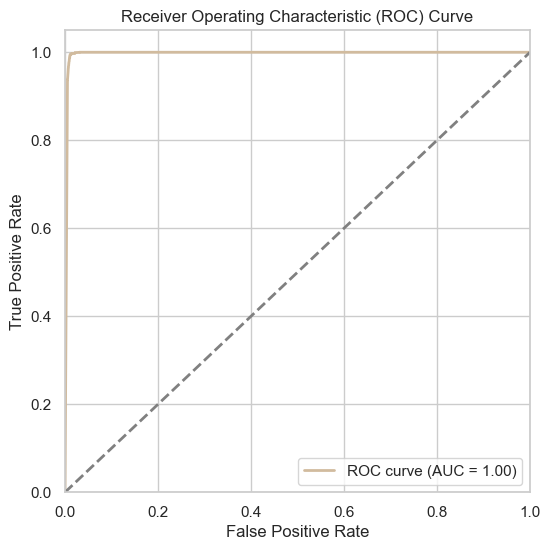

In [45]:
y_probs = rf_model_oversampled.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='#D1BB9E', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
# Perform k-fold cross-validation
scores = cross_val_score(rf_model_oversampled, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy and standard deviation of the cross-validation scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Mean Accuracy: 0.9660092490100773
Standard Deviation of Accuracy: 0.0010790552679904987


In [47]:
# Create a copy of the original DataFrame
original_encoded = df.copy()

# Initialize a dictionary to store the encoders
encoders = {}

# Iterate over categorical columns and create LabelEncoders
for col in X_oversampled.select_dtypes(include=['object']).columns:
    encoders[col] = LabelEncoder().fit(X_oversampled[col])

In [48]:
encoders

{'region_code': LabelEncoder(),
 'segment': LabelEncoder(),
 'model': LabelEncoder(),
 'fuel_type': LabelEncoder(),
 'max_torque': LabelEncoder(),
 'max_power': LabelEncoder(),
 'engine_type': LabelEncoder(),
 'is_esc': LabelEncoder(),
 'is_adjustable_steering': LabelEncoder(),
 'is_tpms': LabelEncoder(),
 'is_parking_sensors': LabelEncoder(),
 'is_parking_camera': LabelEncoder(),
 'rear_brakes_type': LabelEncoder(),
 'transmission_type': LabelEncoder(),
 'steering_type': LabelEncoder(),
 'is_front_fog_lights': LabelEncoder(),
 'is_rear_window_wiper': LabelEncoder(),
 'is_rear_window_washer': LabelEncoder(),
 'is_rear_window_defogger': LabelEncoder(),
 'is_brake_assist': LabelEncoder(),
 'is_power_door_locks': LabelEncoder(),
 'is_central_locking': LabelEncoder(),
 'is_power_steering': LabelEncoder(),
 'is_driver_seat_height_adjustable': LabelEncoder(),
 'is_day_night_rear_view_mirror': LabelEncoder(),
 'is_ecw': LabelEncoder(),
 'is_speed_alert': LabelEncoder()}

In [49]:
# Transforming categorical columns in the original encoded dataset using fitted LabelEncoders
for col in original_encoded.select_dtypes(include='object').columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

# Making predictions on the transformed dataset using the trained model
original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

In [50]:
# Create a DataFrame to compare actual and predicted values of the 'claim_status' column
comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

# Display the DataFrame
comparison_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
58587,0,0
58588,0,0
58589,0,0
58590,0,0


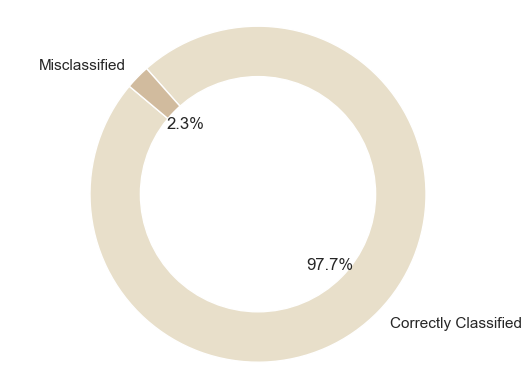

In [51]:
# Calculate the counts of correctly and incorrectly classified samples
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

# Store the counts in a list
classification_counts = [correctly_classified, incorrectly_classified]

# Define labels for the counts
labels = ['Correctly Classified', 'Misclassified']
# Create a pie chart
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#E8DFCA', '#D1BB9E'])

# Draw a circle in the center to create a ring
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()